In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data and check dataset basic information

data = pd.read_csv('HRDataset_v14.csv')
print(data.sample(5))

data.info()

         Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
46    Chivukula, Enola  10240          0                0         0   
58   Crimmings,   Jean  10132          0                0         0   
136        Huynh, Ming  10160          0                2         0   
18       Becker, Renee  10245          0                0         0   
86      Exantus, Susan  10290          1                1         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
46             5       5            3                       0   64786  ...   
58             2       5            3                       0   56149  ...   
136            5       5            3                       0   68182  ...   
18             4       3            3                       0  110000  ...   
86             4       4            2                       0   99280  ...   

         ManagerName  ManagerID RecruitmentSource   PerformanceScore  \
46          Amy Dunn       11.0 

In [ ]:
'''Conclusion:
    1. There are 311 entries with 36 columns.
    1. No missing data in the dataset.
    2. Some data type need to be converted, such as DataofHire, DateofTermination, DOB'''

In [3]:
# Convert data type
data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])
data['DOB'] = pd.to_datetime(data['DOB'])

# Add the column 'WorkDur' to calculate the employees' working period 

data['WorkDur'] = (data['DateofTermination'] - data['DateofHire'])//np.timedelta64(1,'Y')
data['Age'] = (pd.to_datetime('2019-2-28') - data['DOB'])//np.timedelta64(1,'Y')
data.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,WorkDur,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,NaN,35
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,1.0,43
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,1.0,30
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,NaN,30
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,5.0,29


In [ ]:
'''Eploratory Data Analysis

    As this report will analyze the left rate, we will explore the relevant information through the following aspects: 
    1. The proportion of the employment status?
    2. The correlation analysis between the numberical variables?
    3. The proportion of the employment status regards the categorical variables, 
       including deparments, sex/Marital Status, termination reasons, etc '''

EmploymentStatus
Active                    207
Terminated for Cause       16
Voluntarily Terminated     88
Name: EmpID, dtype: int64


([<matplotlib.patches.Wedge at 0x1fd6d43ac70>,
 [Text(-1.759990022951101, 0.0059261380834167675, 'Active'),
  Text(1.2301314018103493, -1.5259019412400345, 'Terminated for Cause'),
  Text(1.935506408020284, 0.3088930956049669, 'Voluntarily Terminated')],
 [Text(-0.47999727898666383, 0.0016162194772954817, '66.56%'),
  Text(0.4267802822607334, -0.5293945510424609, '5.14%'),
  Text(0.6715022231907106, 0.10716699235274363, '28.30%')])

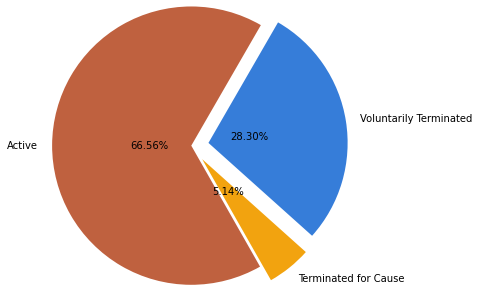

In [4]:
# 1. What is the proportion of the employment status

Term_count = data.groupby('EmploymentStatus')['EmpID'].count()
print(Term_count)

plt.pie(
    Term_count,
    explode= [0,0.2,0.2],
    labels= Term_count.index,
    colors= ['#BF613F','#F2A30F','#367DD9'],
    radius = 1.6,
    autopct= '%.2f%%',
    pctdistance = 0.3,
    startangle = 60)

<AxesSubplot:>

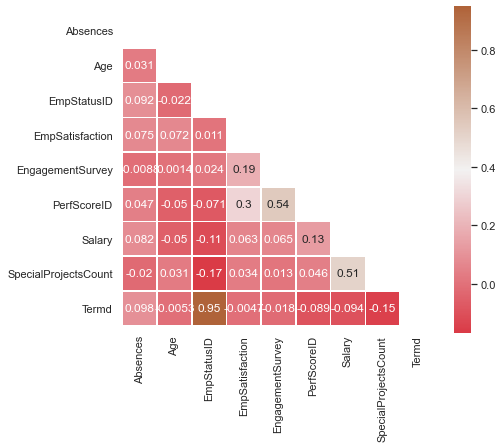

In [5]:
# 2. Correlation analysis

df = data[['Absences','Age','EmpStatusID','EmpSatisfaction','EngagementSurvey',
           'PerfScoreID','Salary','SpecialProjectsCount','Termd']]

corr = df.corr()

sns.set(style='white')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] =True

fig = plt.figure(figsize= (7,6))
cmap = sns.diverging_palette(10,30, as_cmap =True)

sns.heatmap(corr, mask = mask, cmap = cmap,
                 annot = True, square=True, xticklabels= True, yticklabels= True, linewidth= .5)

In [ ]:
'''
Conclusion:
    1. Positive correlation:
        - Engagement and Performance
        - Salary and special project count
    2. However, those elements has not shown any correlation with termination    

'''

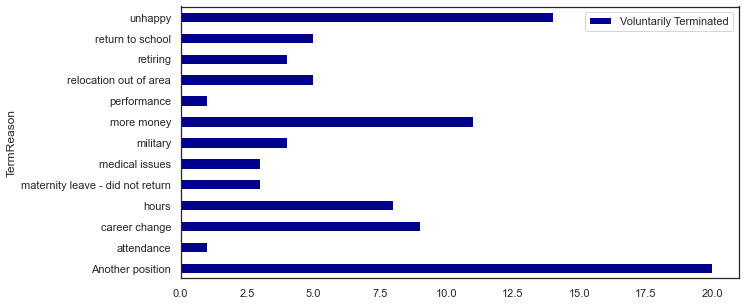

In [6]:
# 3.1 What is the most termination reason? 

TermReason = data[data['EmploymentStatus'] == 'Voluntarily Terminated'][['EmploymentStatus','TermReason']]


TermReason_count = TermReason.groupby('TermReason').count()



TermReason_count.plot(kind='barh',color = 'darkblue', figsize=(10,5))
plt.legend(labels=['Voluntarily Terminated'], loc= 1)


In [ ]:
'''
Conclusion:
    The top 3 of termination reason are: Another position, unhappy, and more money
 
 
Inference:
    1. Is there any issues in some particular departments?
 
'''

['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']


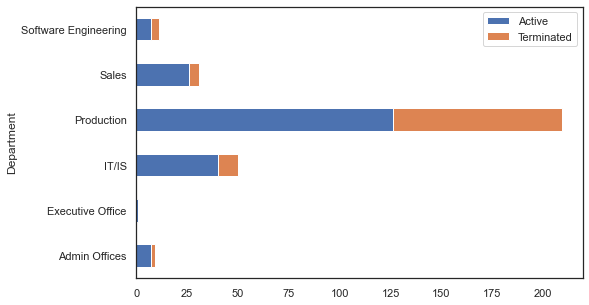

In [7]:
# 3.2 What is the proportion of the termination regards deparments?

# Check the general information of department
print(data['Department'].unique())

# Clean the data
data.replace('Production       ','Production',inplace=True)


dpt_table = pd.crosstab(index=data['Department'], columns = data['Termd'])
dpt_table.plot(kind='barh', figsize=(8,5), stacked= True)
plt.legend(labels=['Active','Terminated'])

In [ ]:
'''
Conclusion:
    Termination rate in Production is relatively higher than other departments, followed by Software Engineering.
 
 
Inference:
    1. What is the proportion of termination reason regards department?
    2. What is the distribution of salary regards department?
'''

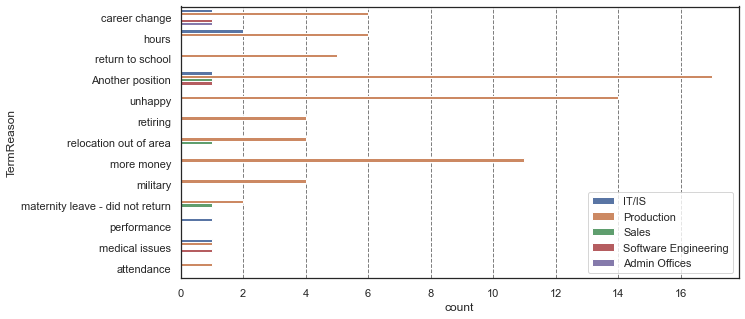

In [8]:
# 3.2.1 What is the proportion regards department?

dptR = data[data['EmploymentStatus']== 'Voluntarily Terminated'][['EmploymentStatus','TermReason','Department']]

# Rename the column
dptR.rename(columns ={'EmploymentStatus':'Voluntarily Terminated'}, inplace = True)


fig = plt.figure(figsize= (10,5))
sns.countplot(y='TermReason', hue='Department',data=dptR)
plt.grid(axis = 'x', color ='gray', linestyle ='--')
plt.legend(loc=4)


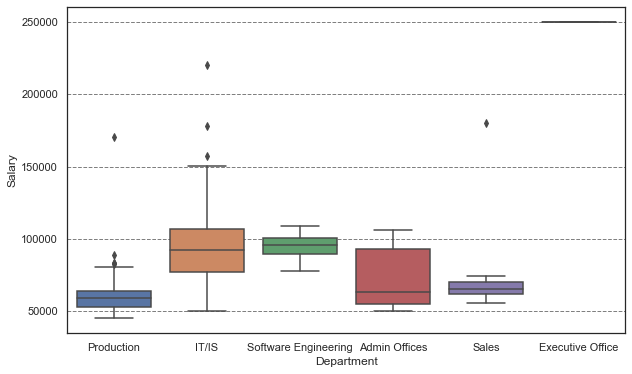

In [9]:
# 3.2.2 What is the distribution of salary regards department?

fig = plt.figure(figsize=(10,6))
sns.boxplot(x= 'Department', y= 'Salary', data= data)
plt.grid(axis='y', color='gray', linestyle='--')

In [ ]:
'''
Conclusion:
    1. All the staffs who left the company because of hapiness and money are from production
    2. The termination rate of 'another position' in production is much higher than other department
    3. The salary of production is relatively lower than other department
    4. Though the left rate in Software Engineering is relatively higher, but the reasons were quite even.
    
Deduction:
    Employees in production left the company were not satisfied with their salaries. 
     
'''

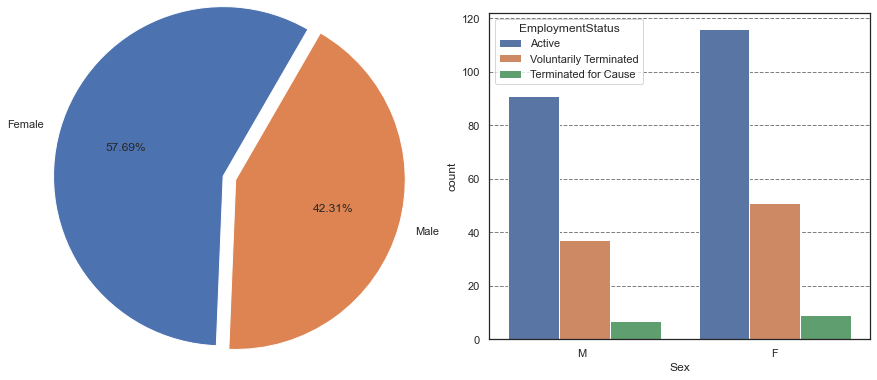

In [10]:
# 3.3 What is the proportion of the termination regards sex?

sex_count = data.groupby(['Sex'])['Termd'].sum()

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1,2,1)
plt.pie(
    sex_count,
    explode=[0,0.1],
    labels= ['Female','Male'],
    colors= None,
    radius = 1.3,
    autopct= '%.2f%%',
    startangle = 60)

ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Sex', hue='EmploymentStatus',data=data)
plt.grid(axis = 'y', color ='gray', linestyle ='--')


In [ ]:
'''
Conclusion:
    The termniation rate is relatively even regards sex. 
    

Inference:
    Is there any special distribution in Top 3 termination reasons regards marital status?
    
'''

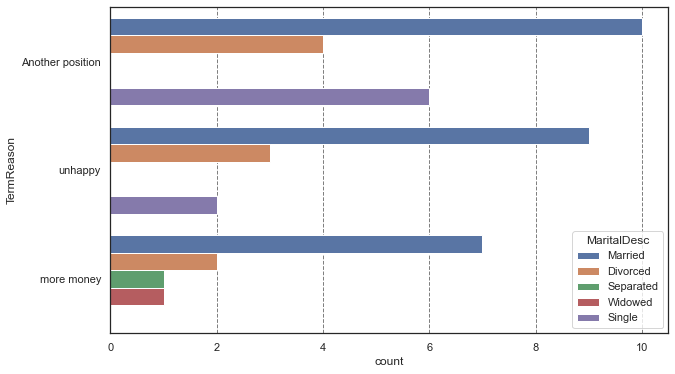

In [11]:
# 3.4 Termination reason analysis regards marital status.

TermR = data[(data['TermReason']=='Another position')| 
                (data['TermReason']=='more money')|
                (data['TermReason']=='unhappy')][['TermReason','MaritalDesc']]
TermR

fig= plt.figure(figsize=(10,6))
sns.countplot(y='TermReason', hue='MaritalDesc',data=TermR,orient= 'h')
plt.grid(axis = 'x', color ='gray', linestyle ='--')

In [ ]:
'''
Conclusion:
    1. No signle employee left the company due to money
    2. More married employees left the company due to position change and unhappiness
    3. The most reason why the single employees left the company is because of position change
 
 
Induction:
    1. Married employees changed the position might be due to family issue, such as shifting;
       However, single employees might change their position due to career development.
    2. Single employees might focus less on salary than career development
    

'''

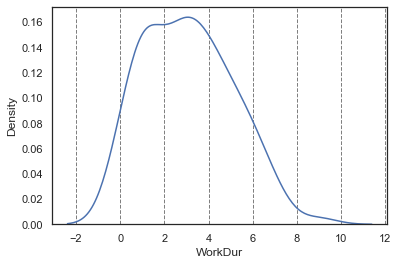

In [12]:
# 3.5 What is the distribution regards working year?

WorkYear = data[data['Termd']==1][['Termd','WorkDur']]

sns.kdeplot(WorkYear['WorkDur'])
plt.grid(axis = 'x', color ='gray', linestyle ='--')

In [ ]:
'''
Conclusion:
    Most employees left the company during the 1st and 3rd year.
'''

In [ ]:
'''
Summies:

    1. The most reason why the employees left the company was because of position change. The two major groups 
        (regards marital status) are married and single. Though we had inferred that it was because of family issues or 
        career development, it still needs further investigation. 
    2. The second and third most reason caused the termination was unhappy and more money. Surprisedly, all the employees
        left because of these two reasons were from Production. From the salary comparision from different departments, 
        we inferred that the low salary casued the high leave rate in Production. 
    3. The employees who left the company had been working in the company for 1 to 3 years. Considering of the most termination
        reasons, it is not difficult to infer that the employees expected career development/change within the first 3 years.
        However, as there is no information related to promotion, the inference need to be further confirmed.              
'''

In [ ]:
'''
Project and self Review:

    1. Through the project, I have gone through most used data processing methods in Python, though still long way to
        familiar myself with them.
    2. The data is too clean that I could not practice data cleansing in this project. 
    3. Future plan:
        - Further familiar with fundamental knowledge such as statistics
        - Further study in ML
'''